In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import RandomOverSampler

from utils import read_csv_custom, plot_class_freq, oversample, undersample_split, merge_classes, undersample
from config import X_TRAIN_PATH, Y_TRAIN_PATH, OVER_DIR, UNDER_DIR

In [2]:
X_train = read_csv_custom(X_TRAIN_PATH)
X_train.shape

(464, 482739)

In [3]:
y_train = pd.read_csv(Y_TRAIN_PATH, header=None)
y_train.shape

(464, 1)

# For reference

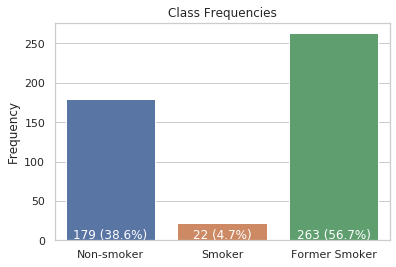

In [4]:
plot_class_freq(y_train)

# 3 Classes

### Oversampling

In [5]:
random_state = 0
X_over, y_over = oversample(X_train, y=y_train, random_state=random_state)

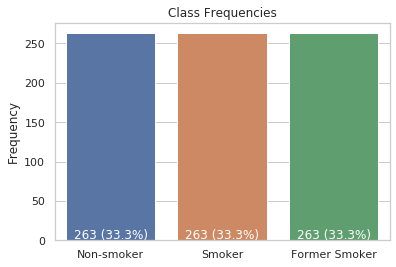

In [6]:
plot_class_freq(y_over)

### Undersampling - splits

In [7]:
num_splits = 10
random_state = 0
splits = undersample_split(X_train, y=y_train, num_splits=num_splits, random_state=random_state)

In [8]:
for X_under, y_under in splits:
    print(X_under.shape, y_under.shape)

(67, 482739) (67,)
(67, 482739) (67,)
(67, 482739) (67,)
(66, 482739) (66,)
(66, 482739) (66,)
(66, 482739) (66,)
(66, 482739) (66,)
(66, 482739) (66,)
(66, 482739) (66,)
(65, 482739) (65,)


TODO: plot # of examples for each undersampled dataset

In [9]:
# from collections import Counter

# id_to_class = {0: 'Non-smoker', 2: 'Former'}
# counts = Counter()
# random_state = 0
# num_splits = 10
# for class_id, majority_class in ((0, 'Non-smoker'), (2, 'Former')):
#     lengths = [len(split) for split in
#                 np.array_split(majority_class.sample(frac=1, random_state=random_state), num_splits)]
#     for i, s in enumerate(splits):
#         class_id_split = f'{class_id}_{i}'
        

# 2 Classes

### Oversampling

In [10]:
random_state = 0
y_merge = merge_classes(y_train, [1, 2], col=0)
_, y_over = oversample(X_train, y=y_merge, random_state=random_state)

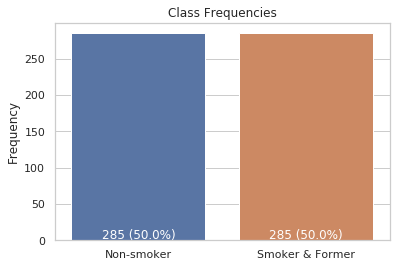

In [11]:
plot_class_freq(y_over, ticklabels=['Non-smoker', 'Smoker & Former'])

### Undersampling

In [12]:
random_state = 0
y_merge = merge_classes(y_train, [1, 2], col=0)
_, y_under = undersample(X_train, y=y_merge, random_state=random_state)

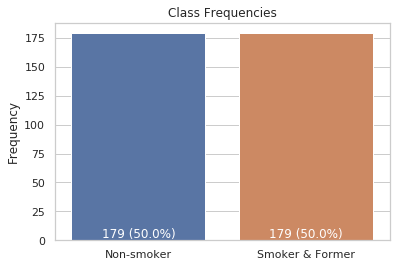

In [13]:
plot_class_freq(y_under, ticklabels=['Non-smoker', 'Smoker & Former'])